# Domain wall - skyrmion conversion

In [4]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

In [5]:
A = 15e-12
alpha = 0.3
Ms = 5.8e5
D = 3e-3
K1 = 0.5e6
u = (0, 0, 1)

In [6]:
system = oc.System(name="conversion")

In [7]:
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass="Cnv") + oc.UniaxialAnisotropy(K1=K1, u=u)

In [8]:
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=alpha)

In [9]:
p1 = (0, 0, 0)
p2 = (150e-9, 50e-9, 2e-9)
cell = (2e-9, 2e-9, 2e-9)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

In [10]:
def Ms_fun(pos):
    x, y, z = pos
    if x < 50e-9 and (y < 15e-9 or y > 35e-9):
        return 0
    else:
        return Ms
    
def m_init(pos):
    x, y, z = pos
    if 30e-9 < x < 40e-9:
        return (0.1, 0.1, -1)
    else:
        return (0.1, 0.1, 1)

In [11]:
system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

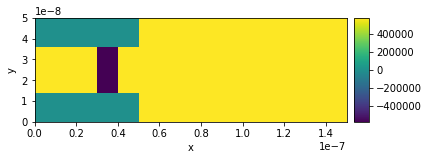

In [12]:
system.m.z.plot_plane(z=0);

In [13]:
md = oc.MinDriver()
md.drive(system)

2018/3/26 16:33: Calling OOMMF (conversion/conversion.mif) ... [0.9s]


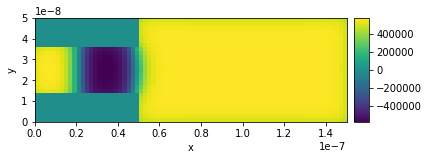

In [14]:
system.m.z.plot_plane(z=0);

In [15]:
ux = 402.35  # velocity in x direction
beta = 0.5  # non-adiabatic STT parameter

system.dynamics += oc.STT(u=(ux, 0, 0), beta=beta)

In [16]:
td = oc.TimeDriver()
td.drive(system, t=0.2e-9, n=200)

2018/3/26 16:33: Calling OOMMF (conversion/conversion.mif) ... [3.7s]


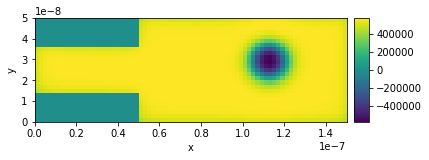

In [17]:
system.m.z.plot_plane(z=0);